<h1>Multi-Class Classification for CIFAR-10 Dataset and PCA</h1>
For this image dataset (you are familiar with this dataset already), we will be using a classification algorithm that we covered before (logistic regression). In this notebook, we will dive deeper into 'image' dataset, its particulars and gain more insights about its representation (features) for machine learning (ML) algorithms. In previous lectures, you were already shown how Convolutional Neural Network (CNN) was applied and its performance. Logistic regression's performance is generally not on-par with CNN for such image dataset. We will also touch upon why. At the same time, we will outline the usefulness of a dimensionality reduction (feature engineering) technique (PCA) by explaining its operating principle.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter("ignore") # for tensorflow packages: we will just use the cifar10 dataset from tensorflow library - nothing else

# dataset definition: https://www.cs.toronto.edu/~kriz/cifar.html
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data() # loading the cifar10 dataset

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Training dataset shape: (50000, 32, 32, 3)
Testing dataset shape: (10000, 32, 32, 3)

A few image plot with class labels:
****************************


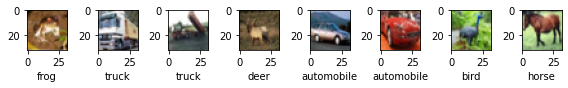

In [2]:
print('Training dataset shape: {}'.format(X_train.shape))
print('Testing dataset shape: {}'.format(X_test.shape))
# the class name to class label mapping is obtained from the dataset definition: https://www.cs.toronto.edu/~kriz/cifar.html
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print('\nA few image plot with class labels:\n****************************')
# plot the first 8 images from the training set and display the class name below each image.
plt.figure(figsize=(8,8))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()

In [7]:
# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)
X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)
X_train /= 255
X_test /= 255

X_train.shape

(50000, 3072)

In [4]:
# at this point, we have converted the CIFAR dataset to be used for Logistic Regression
# how many features are there for each image for this converted dataset?
print('Flattened training dataset shape: {}'.format(X_train.shape))
print('Flattened Testing dataset shape: {}'.format(X_test.shape))

Flattened training dataset shape: (50000, 3072)
Flattened Testing dataset shape: (10000, 3072)


<h2>Part 1: Logistic Regression</h2>
We are applying similar training and evaluation phase that we had seen in Week 5 when Logistic Regression was introduced [the notebook link is <a href='https://github.com/mahtabhossain/comp1804-linear-regression/blob/main/logistic_regression.ipynb'>here</a>]. The only difference is: this is a multi-class classification task compared to the binary classification task that we had covered before.
<h4>Modelling</h4>

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

# just normal Logistic Regression with sklearn's default parameters
# no feature engineering, hyper-parameter tuning etc. are performed here
lr = LogisticRegression()
lr = lr.fit(X_train, y_train) # also, the categorical values are automatically detected as multi-class for sklearn's implementation
                                          # but need to be cautious depending on the choice of algorithm and its implementation details in sklearn

# THE FOLLOWING PART: GridSearch has been disabled for this notebook -- way too many features, may take a long time to converge
# Also, the choice of algorithm may not be suitable for this dataset anyway: shown only for demonstration purpose

# hyper-parameter tuning using in-built GridSearchCV
# This may take a while: good to set the max_iter parameter as well...
#param_grid=[{'C': np.logspace(-4,4,15)},
#           {'penalty': ['l2']},
#           {'solver': ['lbfgs']},
#          {'max_iter': [10000]}]

#grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='accuracy', refit=True) # you can change scoring function that will impact the estimator
#grid = grid.fit(X_train, y_train)
#print('Best estimator: {}\nWeights: {}, Intercept: {}\nBest params: {}\nScorer: {}'.format(grid.best_estimator_, grid.best_estimator_.coef_, grid.best_estimator_.intercept_,grid.best_params_, grid.scorer_))
#print('Available parameters for the estimator (fine-tuning): ',lr.get_params().keys())

<h4>Evaluation</h4>

In [6]:
# model evaluation for training set
y_train_predict = lr.predict(X_train)
print("Training SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_train, y_train_predict), precision_score(y_train, y_train_predict, average='macro'), recall_score(y_train, y_train_predict, average='macro'), f1_score(y_train, y_train_predict, average='macro')))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_train, y_train_predict)))

# model evaluation for testing set
y_test_predict = lr.predict(X_test)

print("\nTesting SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict, average='macro'), recall_score(y_test, y_test_predict, average='macro'), f1_score(y_test, y_test_predict, average='macro')))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_test_predict)))

Training SET
--------------------------------------
Accuracy: 0.429, Precision: 0.424, Recall: 0.429, F1 Score: 0.424
Confusion Matrix:
 [[2488  278  215  167  110  181  128  305  769  359]
 [ 287 2667  106   99   96  179  220  269  390  687]
 [ 457  257 1475  316  532  489  681  406  241  146]
 [ 240  314  427 1250  271 1041  634  261  254  308]
 [ 310  159  660  237 1641  457  669  573  123  171]
 [ 165  268  479  667  334 1913  481  332  202  159]
 [  86  210  310  500  500  437 2494  222  102  139]
 [ 224  197  371  252  449  400  206 2342  150  409]
 [ 856  326   98   96   61  218   61   88 2713  483]
 [ 369  896   81  108   75  143  204  232  435 2457]]

Testing SET
--------------------------------------
Accuracy: 0.405, Precision: 0.400, Recall: 0.405, F1 Score: 0.401
Confusion Matrix:
 [[479  42  59  30  19  38  26  53 184  70]
 [ 60 494  21  28  22  41  37  53  78 166]
 [112  47 276  80 115  93 138  67  48  24]
 [ 42  60  96 235  56 218 127  48  45  73]
 [ 57  28 135  47 291 1

ROC AUC (Training: Class 0 vs Rest)=0.847
ROC AUC (Testing: Class 0 vs Rest)=0.846


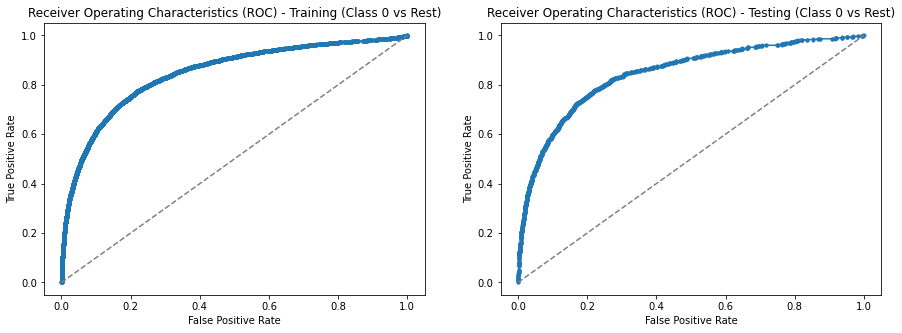

In [7]:
# this part is for the ROC curve
# since we have 10 different classes: we have only shown the curve using class 0 vs rest of the class
# the others can be shown in similar way or even plot inside the same graph
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# specify the class for which you want to view the ROC
class_number = 0

# predict probabilities
lr_probs_train = lr.predict_proba(X_train)
lr_probs_test = lr.predict_proba(X_test)

# roc curve statistics [false and true positive rates] for classes
fpr_train = {}
tpr_train = {}
fpr_test = {}
tpr_test = {}
thresh_train ={}
thresh_test = {}

# true positive rate and false positive rate for all classes: One vs Rest Classifier
for i in range(len(class_names)):    
    fpr_train[i], tpr_train[i], thresh_train[i] = roc_curve(y_train, lr_probs_train[:,i], pos_label=i)
    fpr_test[i], tpr_test[i], thresh_test[i] = roc_curve(y_test, lr_probs_test[:,i], pos_label=i)

print('ROC AUC (Training: Class {} vs Rest)={:.3f}'.format(class_number, auc(fpr_train[class_number], tpr_train[class_number])))
print('ROC AUC (Testing: Class {} vs Rest)={:.3f}'.format(class_number, auc(fpr_test[class_number], tpr_test[class_number])))
  
# plot the roc curve for the training set: shown only regarding Class 0
_ = plt.figure(figsize=(15, 5))
ax1 =plt.subplot(121)
_ = ax1.plot(fpr_train[0], tpr_train[0], marker='.') # change the index here to view Class 1 vs Rest, Class 2 vs Rest, etc.
_ = ax1.plot([0,1], [0, 1], 'gray', linestyle='--', marker='')
_ = ax1.set_title('Receiver Operating Characteristics (ROC) - Training (Class {} vs Rest)'.format(class_number))
_ = ax1.set_xlabel('False Positive Rate')
_ = ax1.set_ylabel('True Positive Rate')

# plot the roc curve for the testing set: shown only regarding Class 0
ax2 = plt.subplot(122)
_ = ax2.plot(fpr_test[0], tpr_test[0], marker='.')
_ = ax2.plot([0,1], [0, 1], 'gray', linestyle='--', marker='')
_ = ax2.set_title('Receiver Operating Characteristics (ROC) - Testing (Class {} vs Rest)'.format(class_number))
_ = ax2.set_xlabel('False Positive Rate')
_ = ax2.set_ylabel('True Positive Rate')

<h2>Part 2: Logistic Regression with Principal Component Analysis (PCA)</h2>
How do you feel about the number of features used above? Furthermore, there was no feature engineering (i.e., transformation of the features, dropping correlated features etc.). Following a similar feature-by-feature analysis that we have performed in our previous Logistic Regression notebook seems impractical - there are too many features to consider. By applying CNN, you could extract 'important' features by the algorithm itself [convolution operators, cascading layers, regularization, etc.]. In this part, we will apply PCA to address the 'curse of dimensionality' issue in order to apply Logistic Regression:<br/>
- We will transform the features along principal components [maximising the variances along them] without even using any knowledge about the output [unsupervised].<br/>
- The original features will be transformed in a way that their variances could be explained by the transformed features.<br/>
- Speed up algorithm's convergence [less feature] but still capturing the 'same' information. It (the transformation) can also help to reduce 'noise' if the original features are noisy measurement.

<h4>Selection of Principal Components</h4>
In this part, we will select the number of principal components that capture the majority of the explained variance of the original features. As can be seen below, using 650, 250 and 100 number of principal components explain 99%, 96% and 90% of the variance. We selected 250 - the original feature will then be projected into these 250 components/axes [new or transformed features].

In [16]:
from sklearn.decomposition import PCA

# checking with various n_components of PCA
# and storing the result -- cumulative variance explained by the transformed features
comp_num_lst = [2, 10, 20, 30, 50, 100, 250, 650]
var_exp_lst = []

for comp_num in comp_num_lst:
    pca_cifar = PCA(n_components=comp_num)
    pca_cifar_transform = pca_cifar.fit_transform(X_train)
    var_exp_lst.append(np.sum(pca_cifar.explained_variance_ratio_))

Explained Variances: {2: 0.40329984, 10: 0.6550183, 20: 0.74454886, 30: 0.7925892, 50: 0.84298915, 100: 0.90096676, 250: 0.95726764, 650: 0.98961836}


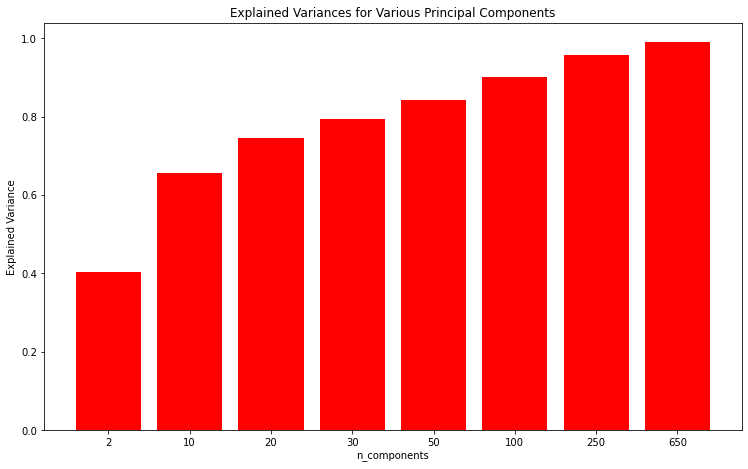

In [58]:
ind = [i for i in range(len(comp_num_lst))]

_ = plt.figure(figsize=(12.5, 7.5))
ax1 =plt.subplot(111)
_ = ax1.set_xticks(ind)
_ = ax1.set_xticklabels(comp_num_lst)
_ = ax1.bar(ind, var_exp_lst, width=0.8, color='red')
_ = ax1.set_title('Explained Variances for Various Principal Components')
_ = ax1.set_xlabel('n_components')
_ = ax1.set_ylabel('Explained Variance')

print('Explained Variances: {}'.format(dict(zip(comp_num_lst, var_exp_lst))))
plt.show()

<h4>Modelling</h4>

In [54]:
from sklearn.pipeline import make_pipeline

# creating a pipeline: first PCA() and then the classifier
# PCA's n_component can be set using the analysis above: note that here again GridSearchCV could be used to find n_components for PCA
pipeline_lr = make_pipeline(PCA(n_components=250), LogisticRegression())
pipeline_lr = pipeline_lr.fit(X_train, y_train)
#print('Weights: {}'.format(pipeline_lr['logisticregression'].coef_))

<h4>Evaluation</h4>
This part's steps are exactly the same as the previous Evaluation - just reproduced for the new classifier.

In [65]:
# model evaluation for training set
y_train_predict = pipeline_lr.predict(X_train)
print("Training SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_train, y_train_predict), precision_score(y_train, y_train_predict, average='macro'), recall_score(y_train, y_train_predict, average='macro'), f1_score(y_train, y_train_predict, average='macro')))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_train, y_train_predict)))

# model evaluation for testing set
y_test_predict = pipeline_lr.predict(X_test)

print("\nTesting SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict, average='macro'), recall_score(y_test, y_test_predict, average='macro'), f1_score(y_test, y_test_predict, average='macro')))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_test_predict)))

Training SET
--------------------------------------
Accuracy: 0.431, Precision: 0.427, Recall: 0.431, F1 Score: 0.428
Confusion Matrix:
 [[2471  298  210  184  121  148  128  284  798  358]
 [ 271 2622  128  137  105  145  229  253  367  743]
 [ 457  233 1452  391  554  444  705  400  219  145]
 [ 241  274  426 1503  274  910  607  250  225  290]
 [ 302  143  666  345 1612  385  728  527  121  171]
 [ 164  235  489  823  336 1796  467  329  206  155]
 [  70  187  337  631  494  394 2477  194   85  131]
 [ 210  202  353  302  444  367  226 2373  149  374]
 [ 797  339  124  124   68  166   74   80 2746  482]
 [ 322  874  117  110   90  109  210  242  424 2502]]

Testing SET
--------------------------------------
Accuracy: 0.408, Precision: 0.403, Recall: 0.408, F1 Score: 0.405
Confusion Matrix:
 [[486  47  50  34  21  28  27  54 183  70]
 [ 58 479  28  35  30  33  38  55  77 167]
 [101  47 271  89 121  81 139  80  51  20]
 [ 46  61 101 269  57 184 126  52  40  64]
 [ 57  23 141  71 291  

ROC AUC (Training: Class 0 vs Rest)=0.850
ROC AUC (Testing: Class 0 vs Rest)=0.851


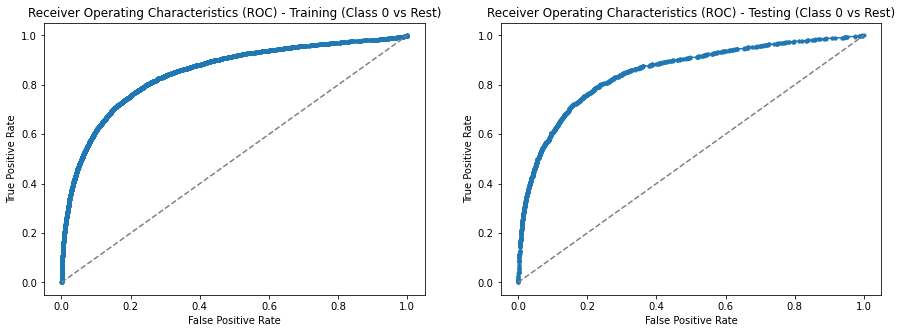

In [61]:
# this part is for the ROC curve
# since we have 10 different classes: we have only shown the curve using class 0 vs rest of the class
# the others can be shown in similar way or even plot inside the same graph
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# specify the class for which you want to view the ROC
class_number = 0

# predict probabilities
lr_probs_train = pipeline_lr.predict_proba(X_train)
lr_probs_test = pipeline_lr.predict_proba(X_test)

# roc curve statistics [false and true positive rates] for classes
fpr_train = {}
tpr_train = {}
fpr_test = {}
tpr_test = {}
thresh_train ={}
thresh_test = {}

# true positive rate and false positive rate for all classes: One vs Rest Classifier
for i in range(len(class_names)):    
    fpr_train[i], tpr_train[i], thresh_train[i] = roc_curve(y_train, lr_probs_train[:,i], pos_label=i)
    fpr_test[i], tpr_test[i], thresh_test[i] = roc_curve(y_test, lr_probs_test[:,i], pos_label=i)

print('ROC AUC (Training: Class {} vs Rest)={:.3f}'.format(class_number, auc(fpr_train[class_number], tpr_train[class_number])))
print('ROC AUC (Testing: Class {} vs Rest)={:.3f}'.format(class_number, auc(fpr_test[class_number], tpr_test[class_number])))
  
# plot the roc curve for the training set: shown only regarding Class 0
_ = plt.figure(figsize=(15, 5))
ax1 =plt.subplot(121)
_ = ax1.plot(fpr_train[0], tpr_train[0], marker='.') # change the index here to view Class 1 vs Rest, Class 2 vs Rest, etc.
_ = ax1.plot([0,1], [0, 1], 'gray', linestyle='--', marker='')
_ = ax1.set_title('Receiver Operating Characteristics (ROC) - Training (Class {} vs Rest)'.format(class_number))
_ = ax1.set_xlabel('False Positive Rate')
_ = ax1.set_ylabel('True Positive Rate')

# plot the roc curve for the testing set: shown only regarding Class 0
ax2 = plt.subplot(122)
_ = ax2.plot(fpr_test[0], tpr_test[0], marker='.')
_ = ax2.plot([0,1], [0, 1], 'gray', linestyle='--', marker='')
_ = ax2.set_title('Receiver Operating Characteristics (ROC) - Testing (Class {} vs Rest)'.format(class_number))
_ = ax2.set_xlabel('False Positive Rate')
_ = ax2.set_ylabel('True Positive Rate')

<h2>Conclusion</h2>
1. What do you feel about the model's performance looking at the various evaluation metrics for both without and with PCA?<br/>
2. You should try to optimise the hyper-parameters of any ML algorithm for a given use-case - in this case, the regularization strength of the logistic regression and also the PCA component determination could be achieved by GridSearchCV. Can be resource hungry based on the number of features [also the dataset size].<br/>
3. Why did you think Logistic Regression performed quite poorly compared to CNN that you have explored before?<br/>
4. Why PCA adoption improve the result a bit here? Any reflecton?<br/>
5. You can also try with the other PCA n_components numbers that we have inspected inside the 'Selection of Principal Components' section, and compare the results with the one (250) that is provided here.